In [2]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(3,3)
qc.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

In [3]:
from qiskit import QuantumCircuit
qc=QuantumCircuit(3,3)
qc.measure([0,1,2],[0,1,2])
qc.draw()

┌─┐      
q_0: ┤M├──────
     └╥┘┌─┐   
q_1: ─╫─┤M├───
      ║ └╥┘┌─┐
q_2: ─╫──╫─┤M├
      ║  ║ └╥┘
c: 3/═╩══╩══╩═
      0  1  2

In [4]:
from qiskit_aer import AerSimulator
sim=AerSimulator()
job=sim.run(qc)
result=job.result()
result.get_counts()

{'000': 1024}

In [5]:
pip install qiskit_aer

Note: you may need to restart the kernel to use updated packages.


In [6]:
qc=QuantumCircuit(3,3)
qc.x([2])
qc.measure([0,1,2],[0,1,2])
qc.draw()

┌─┐      
q_0: ─────┤M├──────
          └╥┘┌─┐   
q_1: ──────╫─┤M├───
     ┌───┐ ║ └╥┘┌─┐
q_2: ┤ X ├─╫──╫─┤M├
     └───┘ ║  ║ └╥┘
c: 3/══════╩══╩══╩═
           0  1  2

In [7]:
sim=AerSimulator()
job=sim.run(qc)
result=job.result()
result.get_counts()

{'100': 1024}

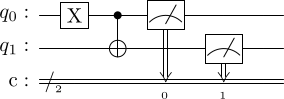

{'11': 1024}

In [8]:
qc=QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
display(qc.draw('latex'))
sim=AerSimulator()
job=sim.run(qc)
result=job.result()
result.get_counts()

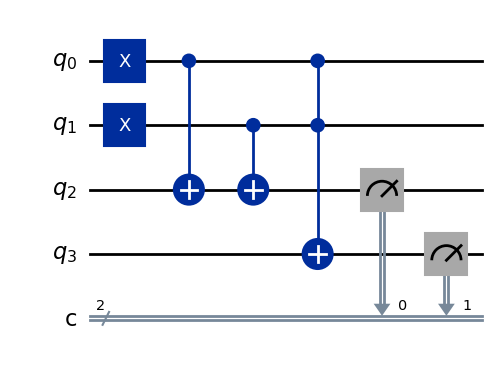

{'10': 1024}

In [9]:
qc=QuantumCircuit(4,2)
qc.x(0)
qc.x(1)
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure(2,0)
qc.measure(3,1)
display(qc.draw(output='mpl'))

job=sim.run(qc)
result=job.result()
result.get_counts()

In [10]:
from qiskit.quantum_info import Statevector
qc=QuantumCircuit(2)
ket=Statevector(qc)
assert ket==Statevector.from_label('00')
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [11]:
qc=QuantumCircuit(2)
qc.x(1)
qc.cx(1,0)
ket=Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

In [12]:
qc=QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
ket=Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

In [13]:
qc=QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.z(0)
qc.cx(1,0)
ket=Statevector(qc)
assert ket==Statevector.from_label('--')
ket.draw('latex')

<IPython.core.display.Latex object>

In [14]:
MESSAGE='00'
qc_alice=QuantumCircuit(2,2)
if MESSAGE[-1]==1:
   qc_alice.x(0)
if MESSAGE[-2]==1:
   qc_alice.x(1)

#qc_alice.draw('mpl')

In [15]:
from qiskit_aer import Aer
backend=Aer.get_backend('aer_simulator')
qc_bob=QuantumCircuit(2,2)
qc_bob.measure([0,1],[0,1])
backend.run(qc_alice.compose(qc_bob)).result().get_counts()


{'00': 1024}

In [17]:
MESSAGE='00'
qc_alice=QuantumCircuit(2)
if MESSAGE[-1]==1:
    qc_alice.x(0)
if MESSAGE[-2]==1:
    qc_alice.x(1)
qc_alice.h(1)
qc_alice.cx(1,0)
#qc.draw('mpl')
ket=Statevector(qc_alice)
ket.draw('latex')

<IPython.core.display.Latex object>

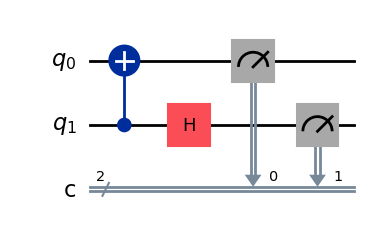

In [18]:
qc_bob=QuantumCircuit(2,2)
qc_bob.cx(1,0)
qc_bob.h(1)
qc_bob.measure([0,1],[0,1])
qc_bob.draw('mpl')

In [20]:
MESSAGE='00'
qc_alice=QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)
if MESSAGE[-2]==1:
    qc_alice.z(1)
if MESSAGE[-1]==1:
    qc_alice.x(1)
ket=Statevector(qc_alice)
ket.draw('latex')

<IPython.core.display.Latex object>

In [22]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

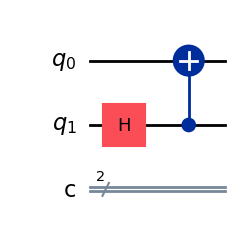

In [23]:
qc_charlie=QuantumCircuit(2,2)
qc_charlie.h(1)
qc_charlie.cx(1,0)
qc_charlie.draw('mpl')

In [24]:
MESSAGE = '01'
qc_alice = QuantumCircuit(2,2)
if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)

In [27]:
backend.run(qc_charlie.compose(qc_alice.compose(qc_bob))).result().get_counts()

{'01': 1024}

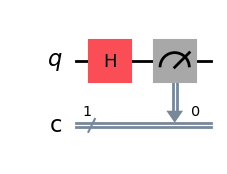

In [32]:
meas_x=QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)
meas_x.draw('mpl')

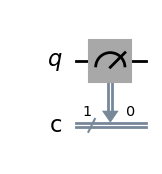

In [30]:
meas_z=QuantumCircuit(1,1)
meas_z.measure(0,0)
meas_z.draw('mpl')

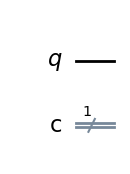

In [34]:
qc=QuantumCircuit(1,1)
qc.draw('mpl')

In [35]:
backend.run(qc.compose(meas_z)).result().get_counts()

{'0': 1024}

In [36]:
backend.run(qc.compose(meas_x)).result().get_counts()

{'0': 505, '1': 519}

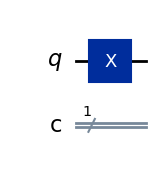

In [37]:
qc=QuantumCircuit(1,1)
qc.x(0)
qc.draw('mpl')

In [39]:
for basis, circ in [('z', meas_z),('x', meas_x)]:
    print("Results from ", basis, " measurement: ", backend.run(qc.compose(circ)).result().get_counts())

Results from  z  measurement:  {'1': 1024}
Results from  x  measurement:  {'1': 498, '0': 526}


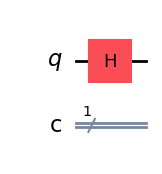

In [40]:
qc=QuantumCircuit(1,1)
qc.h(0)
qc.draw('mpl')

In [41]:
for basis, circ in [('z', meas_z), ('x', meas_x)]:
    print("Results from ", basis, " measurement: ", backend.run(qc.compose(circ)).result().get_counts())

Results from  z  measurement:  {'0': 517, '1': 507}
Results from  x  measurement:  {'0': 1024}


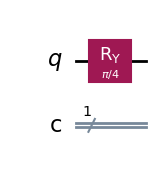

In [42]:
from math import pi
qc=QuantumCircuit(1,1)
qc.ry(pi/4,0)
qc.draw('mpl')

In [45]:
for basis, circ in [('z', meas_z), ('x', meas_x)]:
    print("Results from ", basis, " measurement: ", backend.run(qc.compose(circ)).result().get_counts())

Results from  z  measurement:  {'0': 874, '1': 150}
Results from  x  measurement:  {'0': 885, '1': 139}


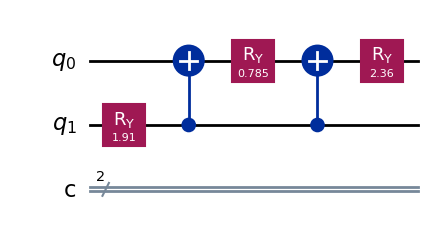

In [47]:
qc_charlie=QuantumCircuit(2,2)
qc_charlie.ry(1.911,1)
qc_charlie.cx(1,0)
qc_charlie.ry(0.785,0)
qc_charlie.cx(1,0)
qc_charlie.ry(2.356,0)

qc_charlie.draw('mpl')

In [48]:
meas_zz=QuantumCircuit(2,2)
meas_zz.measure([0,1],[0,1])

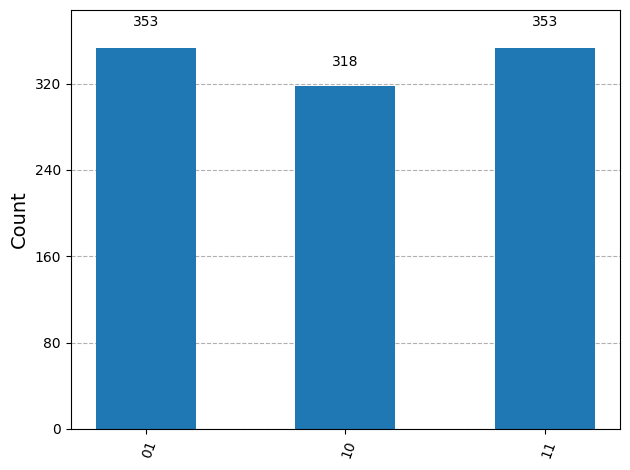

In [50]:
from qiskit.visualization import plot_histogram
counts=backend.run(qc_charlie.compose(meas_zz)).result().get_counts()
plot_histogram(counts)

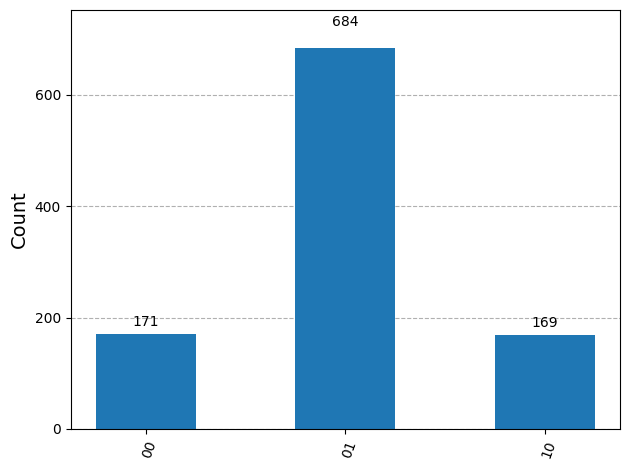

In [51]:
meas_xz=QuantumCircuit(2,2)
meas_xz.h(1)
meas_xz.measure([0,1],[0,1])
counts=backend.run(qc_charlie.compose(meas_xz)).result().get_counts()
plot_histogram(counts)

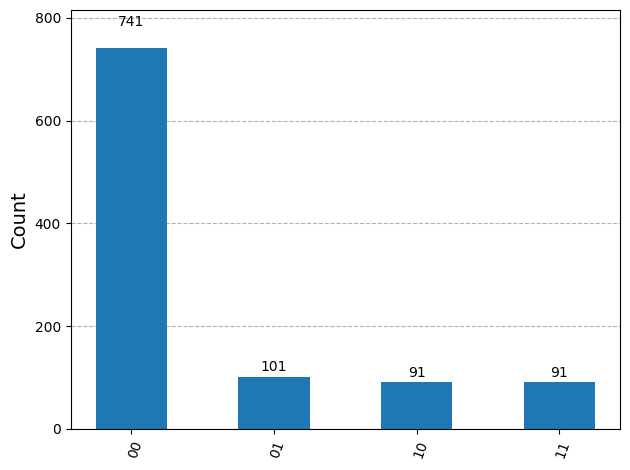

In [53]:
meas_xx=QuantumCircuit(2,2)
meas_xx.h([0,1])
meas_xx.measure([0,1],[0,1])
counts=backend.run(qc_charlie.compose(meas_xx)).result().get_counts()
plot_histogram(counts)